In [ ]:
import pandas as pd

# Read each sheet
results_df = pd.read_excel("GitHub_Possession_Project.xlsx", sheet_name="Sheet1")
possession_df = pd.read_excel("GitHub_Possession_Project.xlsx", sheet_name="Possession")
shots_df = pd.read_excel("GitHub_Possession_Project.xlsx", sheet_name="Shots")
general_df = pd.read_excel("GitHub_Possession_Project.xlsx", sheet_name="Standard", header = 1)
defense_df = pd.read_excel("GitHub_Possession_Project.xlsx", sheet_name="Defensive")

# Quick preview

print(defense_df.head())

In [ ]:
merged_df = (possession_df
             .merge(shots_df, on="Squad", suffixes=("", "_shots"))
             .merge(general_df, on="Squad", suffixes=("", "_general"))
             .merge(defense_df, on="Squad", suffixes=("", "_defense"))
             .merge(results_df, on="Squad", suffixes=("", "_results")))

print(merged_df.head())

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot Possession vs Points
plt.figure(figsize=(8,6))
sns.regplot(x="Poss", y="Pts", data=merged_df)

plt.title("Possession % vs Points")
plt.xlabel("Possession (%)")
plt.ylabel("Points")
plt.show()

# Correlation
corr_poss_pts = merged_df["Poss"].corr(merged_df["Pts"])
print(f"Correlation between Possession % and Points: {corr_poss_pts:.2f}")




In [ ]:
# Scatter plot Touches vs Points
plt.figure(figsize=(8,6))
sns.regplot(x="Touches", y="Pts", data=merged_df)

plt.title("Touches vs Points")
plt.xlabel("Touches")
plt.ylabel("Points")
plt.show()

# Correlation
corr_touch_pts = merged_df["Touches"].corr(merged_df["Pts"])
print(f"Correlation between Touches and Points: {corr_touch_pts:.2f}")


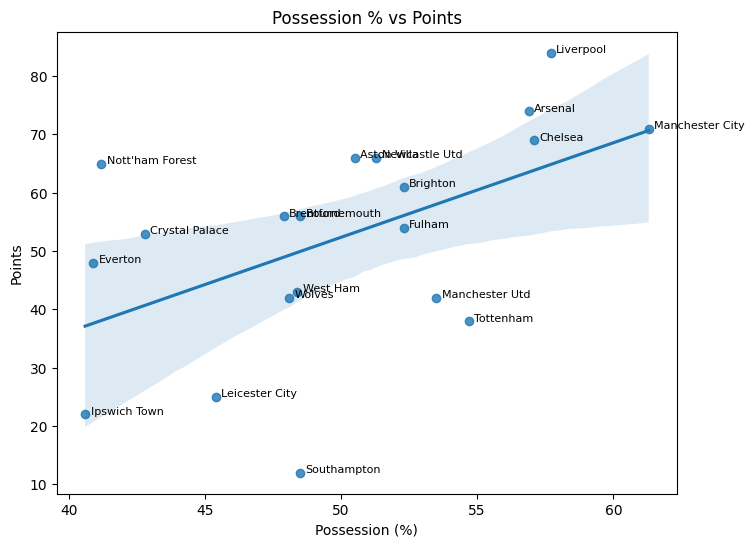

In [9]:
plt.figure(figsize=(8,6))
sns.regplot(x="Poss", y="Pts", data=merged_df)

for i, row in merged_df.iterrows():
    plt.text(row["Poss"]+0.2, row["Pts"], row["Squad"], fontsize=8)  # +0.2 shifts label slightly

plt.title("Possession % vs Points")
plt.xlabel("Possession (%)")
plt.ylabel("Points")
plt.show()


In [10]:
import statsmodels.api as sm

# Define X and y
X = merged_df["Poss"]
y = merged_df["Pts"]

# Add constant for intercept
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X).fit()

# Summary
print(model.summary())



                            OLS Regression Results                            
Dep. Variable:                    Pts   R-squared:                       0.268
Model:                            OLS   Adj. R-squared:                  0.227
Method:                 Least Squares   F-statistic:                     6.582
Date:                Wed, 06 Aug 2025   Prob (F-statistic):             0.0195
Time:                        16:35:23   Log-Likelihood:                -83.187
No. Observations:                  20   AIC:                             170.4
Df Residuals:                      18   BIC:                             172.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -28.6632     31.789     -0.902      0.3

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.regplot(x="Poss", y="Pts", data=merged_df, ci=None)

for i, row in merged_df.iterrows():
    plt.text(row["Poss"]+0.2, row["Pts"], row["Squad"], fontsize=8)

plt.title("Possession % vs Points (with Regression Line)")
plt.xlabel("Possession (%)")
plt.ylabel("Points")
plt.show()


In [12]:
# Define variables
features = ["Poss", "PrgP"]
X = merged_df[features]
y = merged_df["Pts"]

# Add constant for intercept
X = sm.add_constant(X)

# Fit model
model_2 = sm.OLS(y, X).fit()
print(model_2.summary())


                            OLS Regression Results                            
Dep. Variable:                    Pts   R-squared:                       0.675
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     17.67
Date:                Wed, 06 Aug 2025   Prob (F-statistic):           7.05e-05
Time:                        16:56:30   Log-Likelihood:                -75.057
No. Observations:                  20   AIC:                             156.1
Df Residuals:                      17   BIC:                             159.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         66.8958     30.044      2.227      0.0

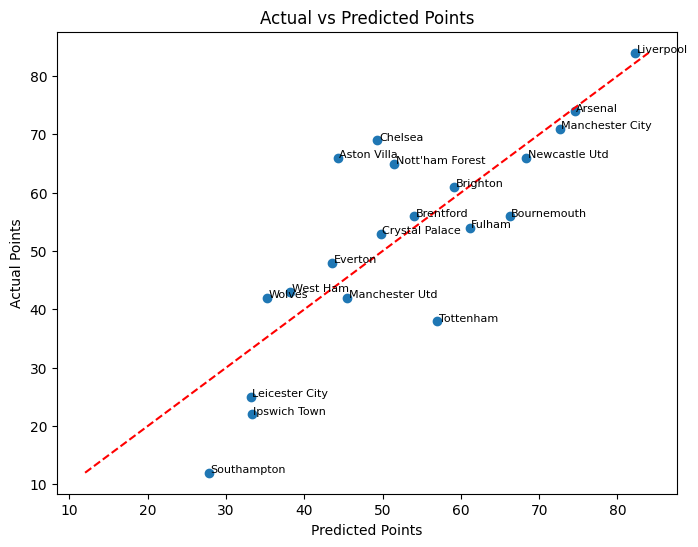

In [13]:
# Get predicted points from model
merged_df["Predicted_Pts"] = model_2.predict(sm.add_constant(merged_df[["Poss", "PrgP"]]))

# Plot: Predicted vs Actual
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(merged_df["Predicted_Pts"], merged_df["Pts"])

# Add team labels
for i, row in merged_df.iterrows():
    plt.text(row["Predicted_Pts"]+0.2, row["Pts"], row["Squad"], fontsize=8)

# Plot 45-degree reference line
plt.plot([merged_df["Pts"].min(), merged_df["Pts"].max()],
         [merged_df["Pts"].min(), merged_df["Pts"].max()],
         color='red', linestyle='--')

plt.xlabel("Predicted Points")
plt.ylabel("Actual Points")
plt.title("Actual vs Predicted Points")
plt.show()


In [14]:
# Define variables (Poss, PrgP, Att Pen)
features = ["Poss", "PrgP", "Att Pen"]
X = merged_df[features]
y = merged_df["Pts"]

# Add constant and fit model
X = sm.add_constant(X)
model_3 = sm.OLS(y, X).fit()

# Summary
print(model_3.summary())


                            OLS Regression Results                            
Dep. Variable:                    Pts   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     24.24
Date:                Wed, 06 Aug 2025   Prob (F-statistic):           3.42e-06
Time:                        17:23:42   Log-Likelihood:                -69.174
No. Observations:                  20   AIC:                             146.3
Df Residuals:                      16   BIC:                             150.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         51.3921     23.480      2.189      0.0

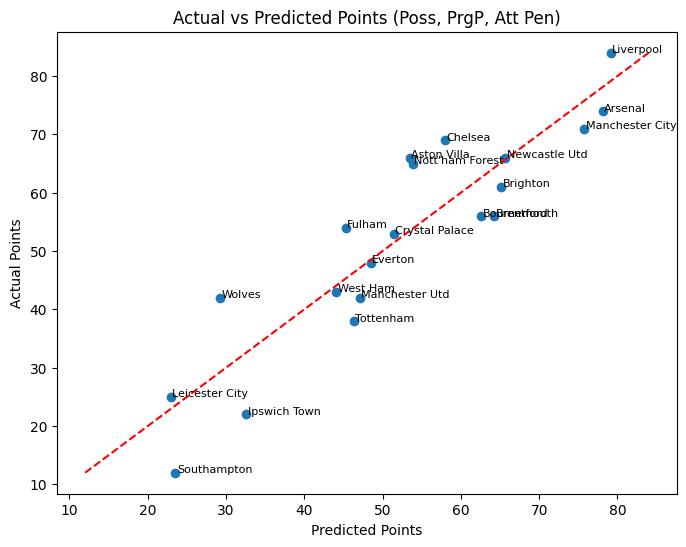

In [15]:
# Predicted points from updated model
merged_df["Predicted_Pts"] = model_3.predict(sm.add_constant(merged_df[["Poss", "PrgP", "Att Pen"]]))

# Plot: Predicted vs Actual Points
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(merged_df["Predicted_Pts"], merged_df["Pts"])

# Add team labels
for i, row in merged_df.iterrows():
    plt.text(row["Predicted_Pts"]+0.2, row["Pts"], row["Squad"], fontsize=8)

# 45-degree line
plt.plot([merged_df["Pts"].min(), merged_df["Pts"].max()],
         [merged_df["Pts"].min(), merged_df["Pts"].max()],
         color='red', linestyle='--')

plt.xlabel("Predicted Points")
plt.ylabel("Actual Points")
plt.title("Actual vs Predicted Points (Poss, PrgP, Att Pen)")
plt.show()


In [17]:
# Define variables
features = ["Poss", "PrgP", "Att Pen", "SCA"]
X = merged_df[features]
y = merged_df["Pts"]

# Add constant and fit model
X = sm.add_constant(X)
model_4 = sm.OLS(y, X).fit()

# Summary
print(model_4.summary())


                            OLS Regression Results                            
Dep. Variable:                    Pts   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     21.13
Date:                Wed, 06 Aug 2025   Prob (F-statistic):           5.06e-06
Time:                        17:32:35   Log-Likelihood:                -67.380
No. Observations:                  20   AIC:                             144.8
Df Residuals:                      15   BIC:                             149.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         31.3495     25.056      1.251      0.2

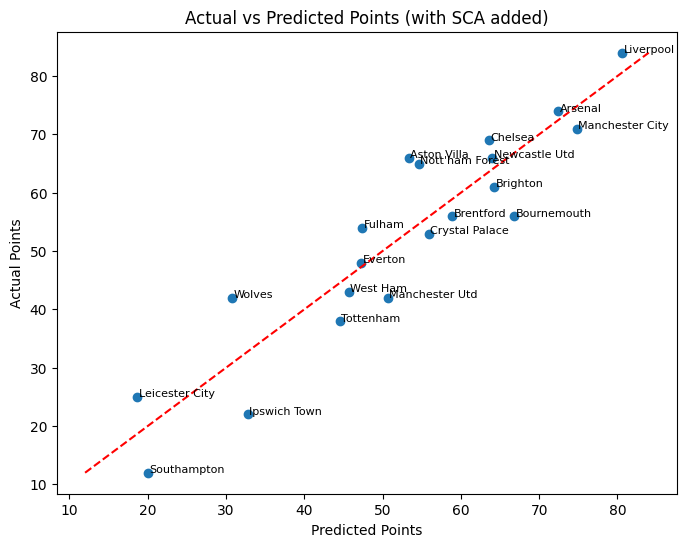

In [18]:
# Update predicted points
merged_df["Predicted_Pts"] = model_4.predict(sm.add_constant(merged_df[features]))

# Plot predicted vs actual
plt.figure(figsize=(8,6))
plt.scatter(merged_df["Predicted_Pts"], merged_df["Pts"])

# Label teams
for i, row in merged_df.iterrows():
    plt.text(row["Predicted_Pts"]+0.2, row["Pts"], row["Squad"], fontsize=8)

# 45-degree reference line
plt.plot([merged_df["Pts"].min(), merged_df["Pts"].max()],
         [merged_df["Pts"].min(), merged_df["Pts"].max()],
         color='red', linestyle='--')

plt.xlabel("Predicted Points")
plt.ylabel("Actual Points")
plt.title("Actual vs Predicted Points (with SCA added)")
plt.show()


In [20]:
# Select numeric columns only
numeric_df = merged_df.select_dtypes(include=["float64", "int64"])

# Drop columns with too many missing values (optional safeguard)
numeric_df = numeric_df.dropna(axis=1, thresh=len(numeric_df)-2)

# Calculate correlations with Points
corr_with_points = numeric_df.corr()["Pts"].sort_values(ascending=False)

# Save to CSV
corr_with_points.to_csv("correlation_with_points.csv", header=True)

print("Correlation file saved as 'correlation_with_points.csv'")

Correlation file saved as 'correlation_with_points.csv'
